In [1]:
import pandas as pd
import  numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Dataset .csv", encoding='ISO-8859-1')

In [3]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ï¿½ï¿½stanbul,"Kemankeï¿½ï¿½ Karamustafa Paï¿½ï¿½a Mahallesi,...",Karakï¿½_y,"Karakï¿½_y, ï¿½ï¿½stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aï¿½ï¿½acÛ±,208,ï¿½ï¿½stanbul,"Koï¿½ï¿½uyolu Mahallesi, Muhittin ï¿½ï¿½stï¿½_...",Koï¿½ï¿½uyolu,"Koï¿½ï¿½uyolu, ï¿½ï¿½stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aï¿½ï¿½ï¿½k Kahve,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df.tail()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ï¿½ï¿½stanbul,"Kemankeï¿½ï¿½ Karamustafa Paï¿½ï¿½a Mahallesi,...",Karakï¿½_y,"Karakï¿½_y, ï¿½ï¿½stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aï¿½ï¿½acÛ±,208,ï¿½ï¿½stanbul,"Koï¿½ï¿½uyolu Mahallesi, Muhittin ï¿½ï¿½stï¿½_...",Koï¿½ï¿½uyolu,"Koï¿½ï¿½uyolu, ï¿½ï¿½stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aï¿½ï¿½ï¿½k Kahve,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ï¿½ï¿½stanbul,"Cafeaï¿½ï¿½a Mahallesi, BademaltÛ± Sokak, No 2...",Moda,"Moda, ï¿½ï¿½stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
replacement_map = {
    'ï¿½': 'I',  
    'ï¿½': 'U', 
    'Û±': 'U'
}

In [6]:
def replace_chars(text):
    for wrong, right in replacement_map.items():
        text = text.replace(wrong, right)
    return text


df = df.applymap(lambda x: replace_chars(x) if isinstance(x, str) else x)


df.tail(10)


C:\Users\user\AppData\Local\Temp\ipykernel_4588\3531363328.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: replace_chars(x) if isinstance(x, str) else x)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9541,5905215,Emirgan SU_tiUU,208,UUstanbul,"Emirgan Mahallesi, SakUp SabancU Caddesi, No 4...",EmirgUUn,"EmirgUUn, UUstanbul",29.056620,41.104969,"Restaurant Cafe, Turkish, Desserts",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,877
9542,5926979,Leman KU_ltU_r,208,UUstanbul,"CaferaUUa Mahallesi, NeUUet U_mer Sokak, No 9/...",KadUkU_y Merkez,"KadUkU_y Merkez, UUstanbul",29.022805,40.989705,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,3,3.7,Yellow,Good,506
9543,5916085,Dem KarakU_y,208,UUstanbul,"KemankeUU Karamustafa PaUUa Mahallesi, Hoca Ta...",KarakU_y,"KarakU_y, UUstanbul",28.978237,41.024633,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.5,Dark Green,Excellent,761
9544,5915547,KarakU_y GU_llU_oUUlu,208,UUstanbul,"KemankeUU Karamustafa PaUUa Mahallesi, RUhtUm ...",KarakU_y,"KarakU_y, UUstanbul",28.977636,41.022904,"Desserts, BU_rek",...,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1305
9545,5915054,Baltazar,208,UUstanbul,"KemankeUU Karamustafa PaUUa Mahallesi, KUlUU_ ...",KarakU_y,"KarakU_y, UUstanbul",28.981103,41.025785,"Burger, Izgara",...,Turkish Lira(TL),No,No,No,No,3,4.3,Green,Very Good,870
9546,5915730,NamlU Gurme,208,UUstanbul,"KemankeUU Karamustafa PaUUa Mahallesi, RUhtUm ...",KarakU_y,"KarakU_y, UUstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AUUacU,208,UUstanbul,"KoUUuyolu Mahallesi, Muhittin UUstU_ndaUU Cadd...",KoUUuyolu,"KoUUuyolu, UUstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,UUstanbul,"KuruU_eUUme Mahallesi, Muallim Naci Caddesi, N...",KuruU_eUUme,"KuruU_eUUme, UUstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,AUUUk Kahve,208,UUstanbul,"KuruU_eUUme Mahallesi, Muallim Naci Caddesi, N...",KuruU_eUUme,"KuruU_eUUme, UUstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,UUstanbul,"CafeaUUa Mahallesi, BademaltU Sokak, No 21/B, ...",Moda,"Moda, UUstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [7]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.isna()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
df.isna().sum().sum()

9

In [11]:
df['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [31]:
mode_value = df['Cuisines'].mode()[0]
df['Cuisines'] = df['Cuisines'].fillna(mode_value)

In [30]:
df.isna().sum().sum()

0

In [14]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(f"Categorical columns: {categorical_columns}")


Categorical columns: Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


In [15]:
label_encoder = LabelEncoder()
for col in categorical_columns:
     df[col] = label_encoder.fit_transform(df[col])
    

In [16]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3742,162,73,8678,171,172,121.027535,14.565443,920,...,0,1,0,0,0,3,4.8,0,1,314
1,6304287,3167,162,73,6047,592,600,121.014101,14.553708,1111,...,0,1,0,0,0,3,4.5,0,1,591
2,6300002,2893,162,75,4676,308,314,121.056831,14.581404,1671,...,0,1,0,0,0,4,4.4,1,5,270
3,6318506,4700,162,75,8683,860,873,121.056475,14.585318,1126,...,0,0,0,0,0,4,4.9,0,1,365
4,6314302,5515,162,75,8682,860,873,121.057508,14.584450,1122,...,0,1,0,0,0,4,4.8,0,1,229


In [17]:
df=df.drop(columns=['Switch to order menu', 'Restaurant ID','Restaurant Name', 'Country Code','City','Address','Locality','Locality Verbose','Longitude','Latitude','Is delivering now','Rating color','Rating text'])

In [18]:
df.corr()

,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
Cuisines,1.000000,0.005877,0.070326,0.050865,-0.016304,-0.005268,-0.080832,-0.032938
Average Cost for two,0.005877,1.000000,0.045566,0.007733,-0.019017,0.075111,0.051864,0.067833
Currency,0.070326,0.045566,1.000000,-0.000118,0.005806,0.075073,-0.005337,-0.026488
Has Table booking,0.050865,0.007733,-0.000118,1.000000,0.101041,0.502166,0.190351,0.169619
Has Online delivery,-0.016304,-0.019017,0.005806,0.101041,1.000000,0.077887,0.226250,0.074532
Price range,-0.005268,0.075111,0.075073,0.502166,0.077887,1.000000,0.438356,0.309474
Aggregate rating,-0.080832,0.051864,-0.005337,0.190351,0.226250,0.438356,1.000000,0.313474
Votes,-0.032938,0.067833,-0.026488,0.169619,0.074532,0.309474,0.313474,1.000000


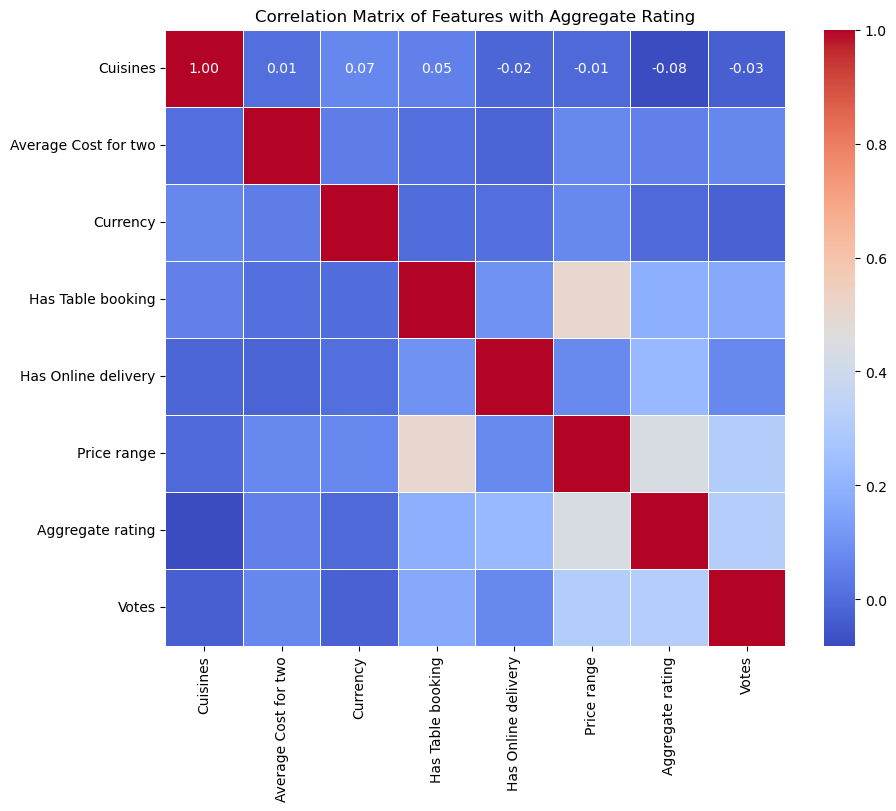

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,  cmap='coolwarm', fmt='.2f', linewidths=0.5,annot=True)
plt.title('Correlation Matrix of Features with Aggregate Rating')
plt.show()

In [20]:
features = ['Price range', 'Votes', 'Has Online delivery', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking']
target = 'Aggregate rating'
X = df[features]
y = df[target]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()


In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)


In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Absolute Error: 1.0447237540926015
Mean Squared Error: 1.6175613662952697
R² Score: 0.2936512571785883


In [27]:
feature_names = X.columns
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance


,Feature,Coefficient
0,Price range,0.652494
1,Votes,0.000630
2,Has Online delivery,0.640597
3,Cuisines,-0.000201
4,Average Cost for two,0.000001
5,Currency,-0.038732
6,Has Table booking,-0.257912


In [28]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

In [29]:
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

importance_df

,Feature,Coefficient,Abs_Coefficient
0,Price range,0.652494,0.652494
2,Has Online delivery,0.640597,0.640597
6,Has Table booking,-0.257912,0.257912
5,Currency,-0.038732,0.038732
1,Votes,0.000630,0.000630
3,Cuisines,-0.000201,0.000201
4,Average Cost for two,0.000001,0.000001
